# Wine Reviews 数据集分析

https://github.com/Catherine134/DataAnalysis_Task

## 1.数据摘要和可视化

### 1.1数据摘要

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

#读取数据集
reviews = pd.read_csv("DA_input/wine-reviews/winemag-data-130k-v2.csv", index_col= 0)
pd.set_option('max_rows', 50)

#显示所有列的属性类型
reviews.dtypes 

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

读取全部列进行属性分析，如下图：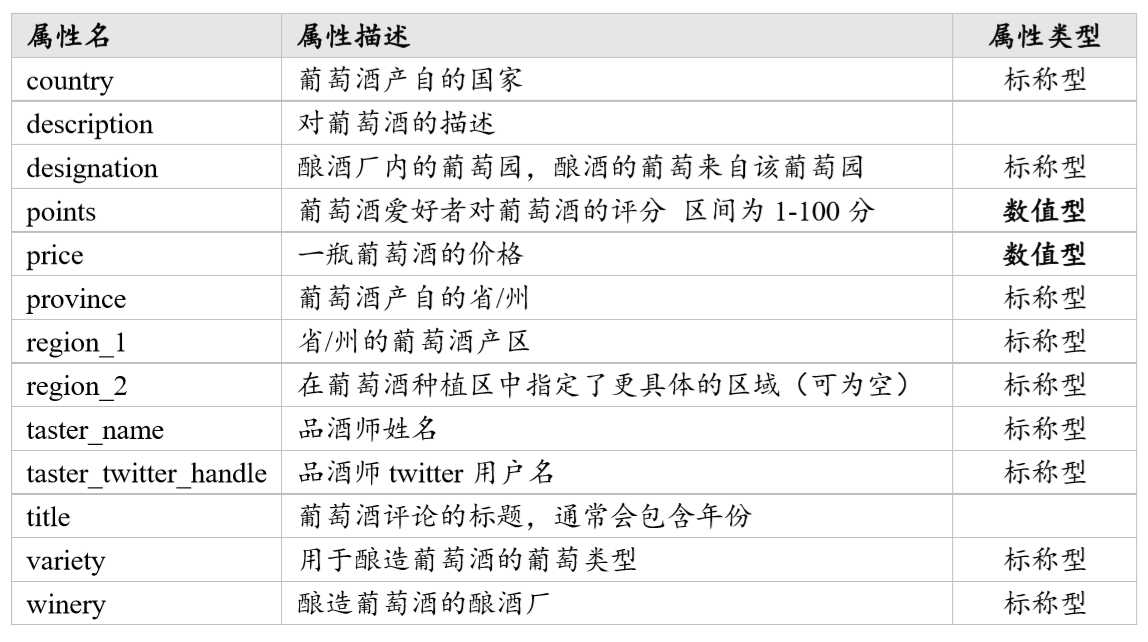

#### 1.1.1标称属性
统计标称属性的各类别的频数。这里着重选取了主要属性的主要类别（频数top15以及top10）。

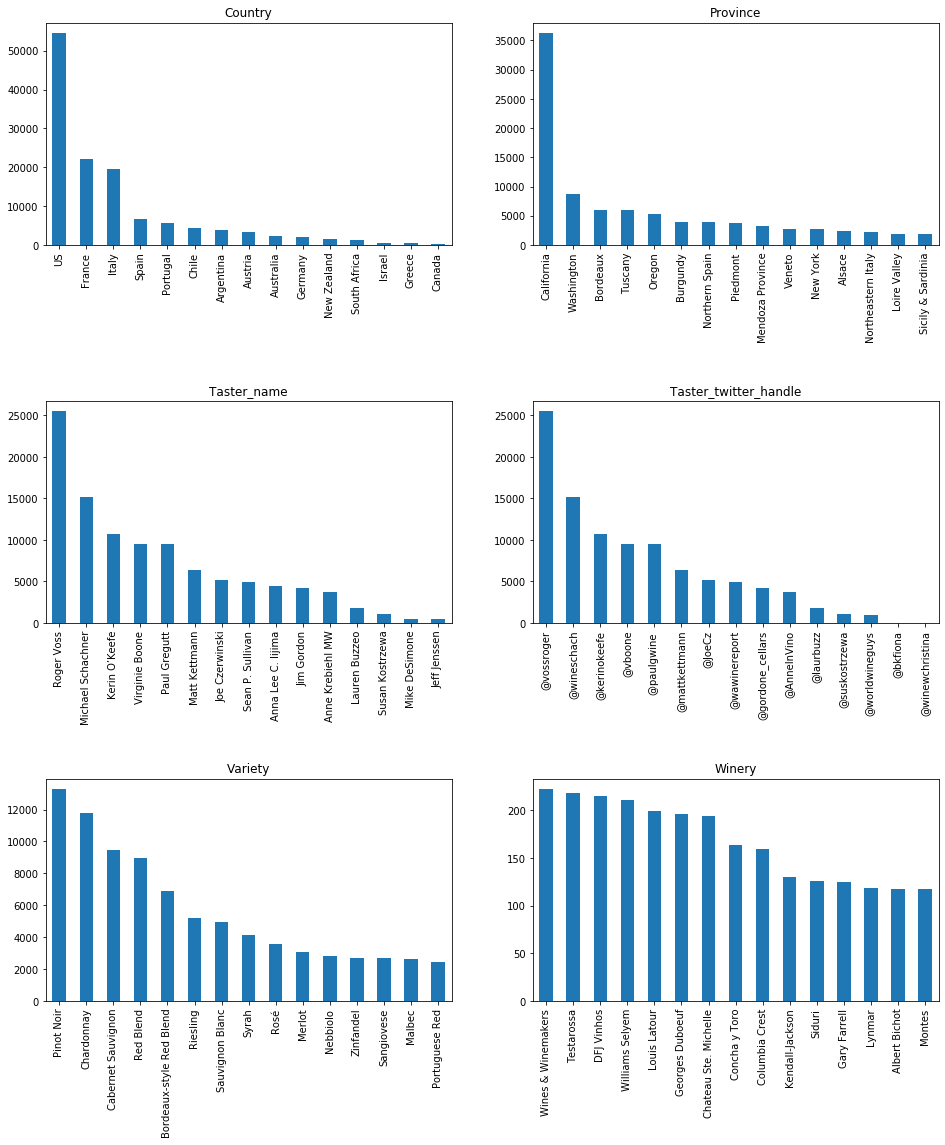

In [2]:
#绘制标称属性的频数分布柱状图
plt.figure(figsize=(16,18))
plt.subplots_adjust(hspace=0.7)

plt.subplot(3,2,1)
plt.title('Country')
reviews['country'].value_counts().head(15).plot.bar() 

plt.subplot(3,2,2)
plt.title('Province')
reviews['province'].value_counts().head(15).plot.bar()

plt.subplot(3,2,3)
plt.title('Taster_name')
reviews['taster_name'].value_counts().head(15).plot.bar()

plt.subplot(3,2,4)
plt.title('Taster_twitter_handle')
reviews['taster_twitter_handle'].value_counts().head(15).plot.bar()

plt.subplot(3,2,5)
plt.title('Variety')
reviews['variety'].value_counts().head(15).plot.bar()

plt.subplot(3,2,6)
plt.title('Winery')
reviews['winery'].value_counts().head(15).plot.bar()

In [3]:
#统计标称属性每个类别的具体频数，取top10
reviews['country'].value_counts().head(10)

US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
Name: country, dtype: int64

In [4]:
reviews['province'].value_counts().head(10)

California          36247
Washington           8639
Bordeaux             5941
Tuscany              5897
Oregon               5373
Burgundy             3980
Northern Spain       3851
Piedmont             3729
Mendoza Province     3264
Veneto               2716
Name: province, dtype: int64

In [5]:
reviews['taster_name'].value_counts().head(10)

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Name: taster_name, dtype: int64

In [6]:
reviews['taster_twitter_handle'].value_counts().head(10)

@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
Name: taster_twitter_handle, dtype: int64

In [7]:
reviews['variety'].value_counts().head(10)

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Name: variety, dtype: int64

In [8]:
reviews['winery'].value_counts().head(10)

Wines & Winemakers       222
Testarossa               218
DFJ Vinhos               215
Williams Selyem          211
Louis Latour             199
Georges Duboeuf          196
Chateau Ste. Michelle    194
Concha y Toro            164
Columbia Crest           159
Kendall-Jackson          130
Name: winery, dtype: int64

#### 1.1.2数值属性
给出五数概括及缺失值的个数

In [9]:
#五数概括
reviews.points.describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

points属性的五数概括：{80，86，88.45，91，100}

In [10]:
reviews.price.describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

price属性的五数概括：{4，17，35.36，42，3300}

In [11]:
#统计缺失值个数
reviews.points.isnull().sum()

0

In [12]:
reviews.price.isnull().sum()

8996

### 1.2数据可视化

#### 1.2.1直方图

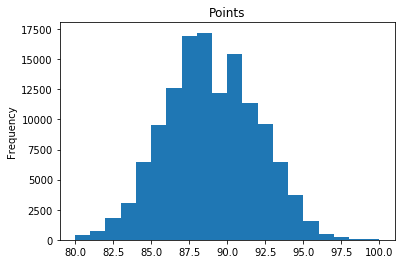

In [15]:
#绘制points直方图
reviews['points'].plot(kind='hist', title='Points', bins=20)

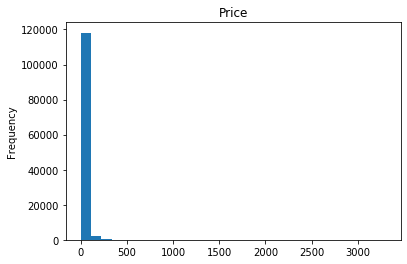

In [16]:
#绘制price直方图
reviews['price'].plot(kind='hist', title='Price', bins=30)

由直方图可知，price属性的大多数值介于0-300之间，所以缩小范围进一步分析：

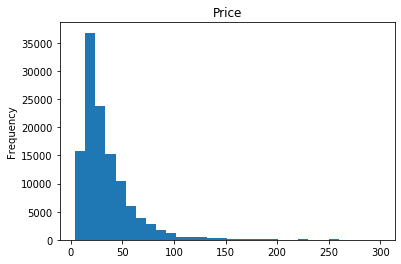

In [19]:
#提取价格<300的行
reviews[reviews['price'] < 300]['price'].plot(kind='hist', title='Price', bins=30)

#### 1.2.2盒图

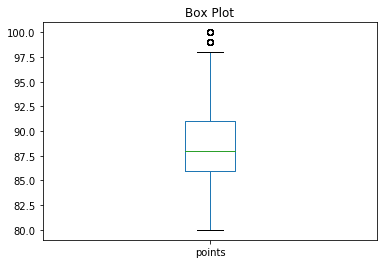

In [20]:
#绘制points盒图
reviews['points'].plot(kind='box', title='Box Plot')

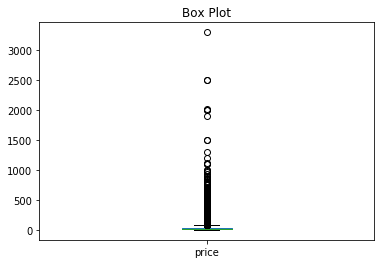

In [21]:
#绘制price盒图
reviews['price'].plot(kind='box', title='Box Plot')

## 2.数据缺失的处理

In [22]:
#统计各属性的缺失值个数
reviews.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [24]:
#查看country列为NaN的数据
reviews[pd.isnull(reviews.country)].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi


In [25]:
#查看price列为NaN的数据
reviews[pd.isnull(reviews.price)].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,NaN,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone
31,Italy,Merlot and Nero d'Avola form the base for this...,Calanìca Nero d'Avola-Merlot,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta
32,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta


In [26]:
#查看taster_name列为NaN的数据
reviews[pd.isnull(reviews.taster_name)].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
31,Italy,Merlot and Nero d'Avola form the base for this...,Calanìca Nero d'Avola-Merlot,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta
32,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta
33,US,"Rustic and dry, this has flavors of berries, c...",Puma Springs Vineyard,86,50.0,California,Dry Creek Valley,Sonoma,NaN,NaN,Envolve 2010 Puma Springs Vineyard Red (Dry Cr...,Red Blend,Envolve
34,US,"This shows a tart, green gooseberry flavor tha...",NaN,86,20.0,California,Sonoma Valley,Sonoma,NaN,NaN,Envolve 2011 Sauvignon Blanc (Sonoma Valley),Sauvignon Blanc,Envolve
37,Italy,This concentrated Cabernet offers aromas of cu...,Missoni,86,21.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Feudi del Pisciotto 2010 Missoni Cabernet Sauv...,Cabernet Sauvignon,Feudi del Pisciotto


观察各字段的数据缺失情况，分析缺失原因：

1.关于葡萄酒的产地信息--当数据的country属性缺失时，对应的province、region_1、region_2也相应地缺失，因为属性所反应的产地信息的详细程度依次递增，所以缺失值的个数递增；另外，region_2在统计时也明确说明，可以为空（不是非常重要），所以缺失值个数最多。

2.关于葡萄酒的价格信息——price属性存在8996条缺失，推测是由于数据不可得或统计时的遗漏造成。

3.关于品酒师的信息——品酒师姓名taster_name与其twitter用户名一般情况下存在一一对应的关系，所以当taster_name属性值有缺失时，相应的taster_twitter_handle属性值也会缺失。

### 2.1将缺失部分剔除

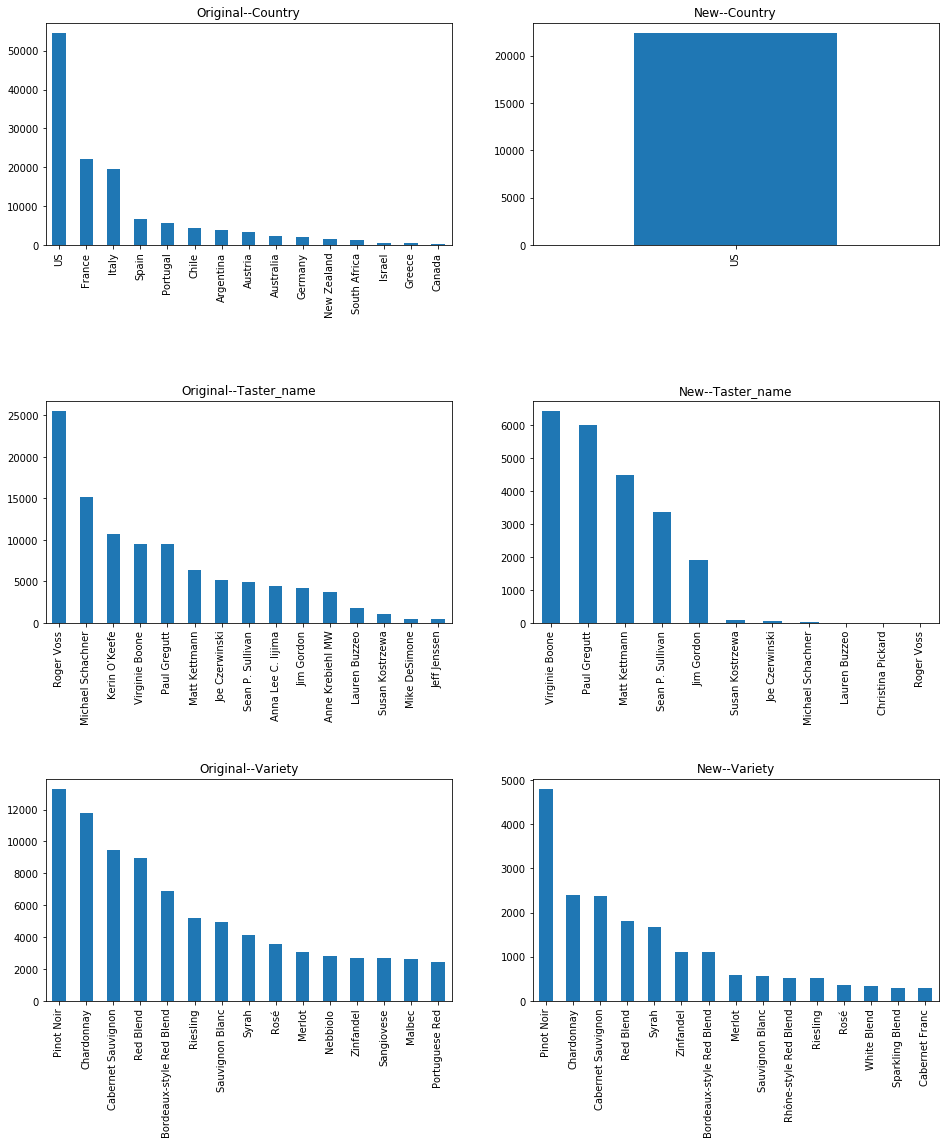

In [28]:
#删除含有空值的行
dropped = reviews.dropna()

#可视化对比新旧数据集
plt.figure(figsize=(16,18))
plt.subplots_adjust(hspace=0.7)

plt.subplot(3,2,1)
plt.title('Original--Country')
reviews['country'].value_counts().head(15).plot.bar() 

plt.subplot(3,2,2)
plt.title('New--Country')
dropped['country'].value_counts().head(15).plot.bar()

plt.subplot(3,2,3)
plt.title('Original--Taster_name')
reviews['taster_name'].value_counts().head(15).plot.bar()

plt.subplot(3,2,4)
plt.title('New--Taster_name')
dropped['taster_name'].value_counts().head(15).plot.bar()

plt.subplot(3,2,5)
plt.title('Original--Variety')
reviews['variety'].value_counts().head(15).plot.bar()

plt.subplot(3,2,6)
plt.title('New--Variety')
dropped['variety'].value_counts().head(15).plot.bar()

### 2.2用最高频率值填补缺失值

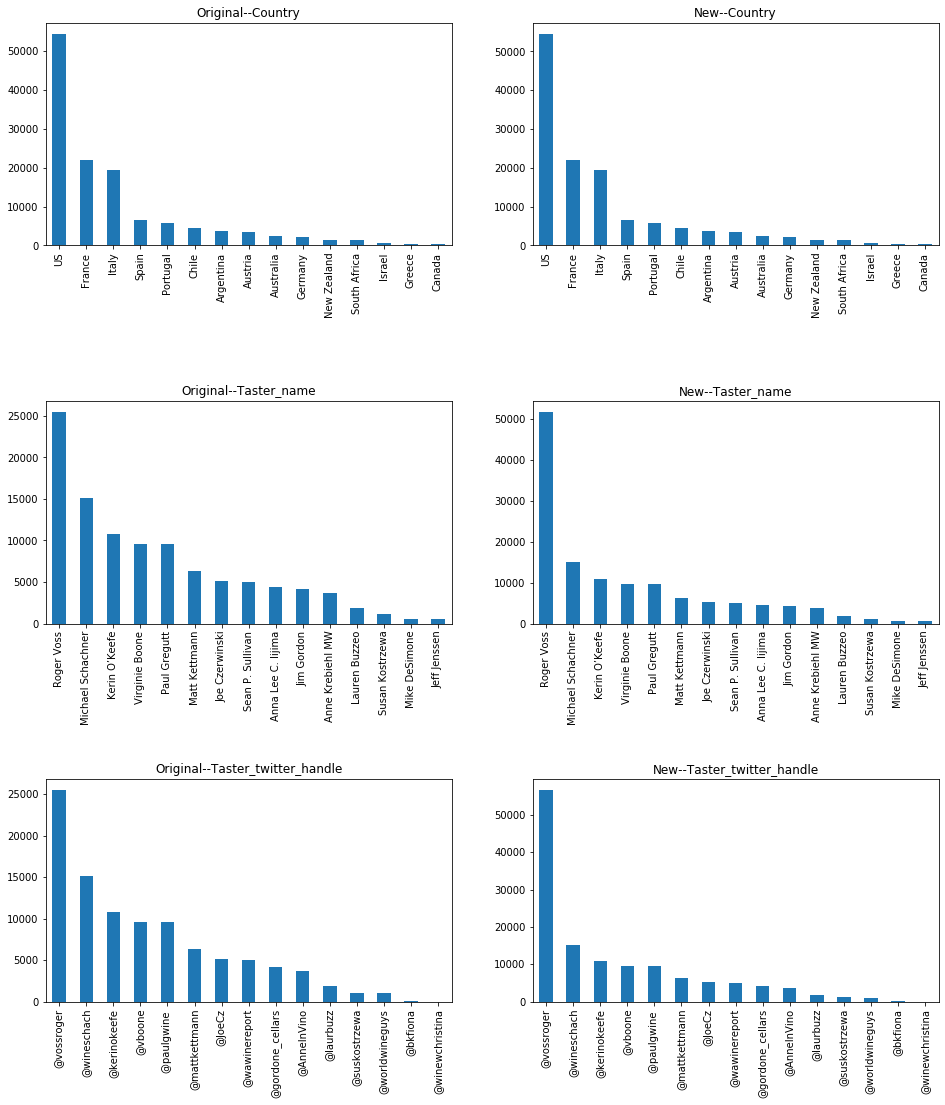

In [29]:
#用各个属性的最高频率值（众数）填补缺失值
replaced = reviews.fillna(reviews.mode().iloc[0])

#可视化对比新旧数据集
plt.figure(figsize=(16,18))
plt.subplots_adjust(hspace=0.7)

plt.subplot(3,2,1)
plt.title('Original--Country')
reviews['country'].value_counts().head(15).plot.bar() 

plt.subplot(3,2,2)
plt.title('New--Country')
replaced['country'].value_counts().head(15).plot.bar()

plt.subplot(3,2,3)
plt.title('Original--Taster_name')
reviews['taster_name'].value_counts().head(15).plot.bar()

plt.subplot(3,2,4)
plt.title('New--Taster_name')
replaced['taster_name'].value_counts().head(15).plot.bar()

plt.subplot(3,2,5)
plt.title('Original--Taster_twitter_handle')
reviews['taster_twitter_handle'].value_counts().head(15).plot.bar()

plt.subplot(3,2,6)
plt.title('New--Taster_twitter_handle')
replaced['taster_twitter_handle'].value_counts().head(15).plot.bar()

### 2.3根据属性的相关关系填补缺失值

In [30]:
#采用随机森林拟合，根据price与points之间的相关性，填补缺失值

from  sklearn.ensemble import RandomForestRegressor

related = reviews.copy()
#提取出数值型数据
price_df = related[['price','points']]

#按照price字段是否缺失，将数据集划分两部分
known = price_df[price_df.price.notnull()].values
unknown = price_df[price_df.price.isnull()].values

#X是points属性值
X = known[:,1:]
#y是结果标签
y = known[:,0]

#fit到随机森林中，训练模型
rfr = RandomForestRegressor(random_state=0, n_estimators=2000,max_depth=3, n_jobs=-1)
rfr.fit(X, y)

#预测缺失的price
predictedNaN = rfr.predict(unknown[:, 1:])
#填补缺失数据
related.loc[related.price.isnull(),'price'] = predictedNaN

related.price.isnull().sum()

0

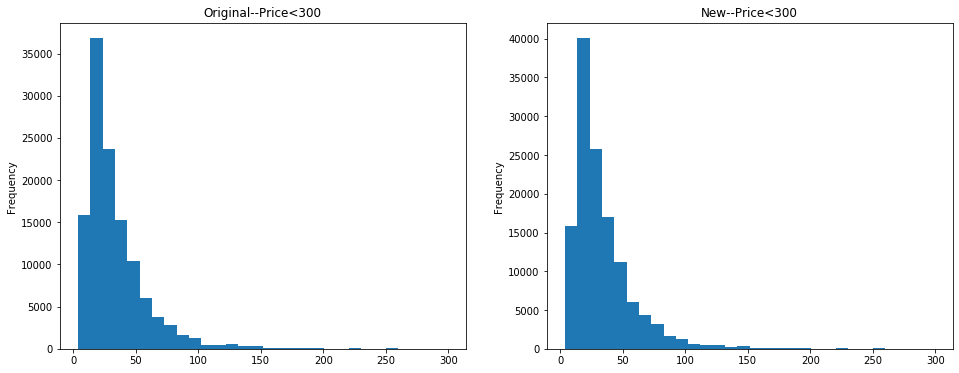

In [39]:
#可视化对比新旧数据集
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
reviews[reviews['price'] < 300]['price'].plot(kind='hist', title='Original--Price<300', bins=30)

plt.subplot(1,2,2)
related[related['price'] < 300]['price'].plot(kind='hist', title='New--Price<300', bins=30)

### 2.4通过数据对象之间的相似性填补缺失值

In [40]:
#k近邻回归器填补缺失值（K-means clustering）

from sklearn.neighbors import KNeighborsRegressor

samed = reviews.copy()
#提取出数值型数据
price_df = samed[['price','points']]

#按照price字段是否缺失，将数据集划分两部分
#x为特征属性points中、price不为NaN的行
x_train = price_df[price_df.price.notnull()].loc[:,['points']]
#y为预测属性price中、price不存在NaN的行
y_train = price_df[price_df.price.notnull()]['price']

#对于连续型变量，使用k近邻回归器，用K个邻居中该变量的平均值预测缺失值
clf = KNeighborsRegressor(n_neighbors = 3, weights = "distance")
clf.fit(x_train, y_train)

#test为待填补的缺失样本：points列price为NaN的行
test = price_df[price_df.price.isnull()].loc[:,['points']]

#预测
predictedNaN = clf.predict(test)

#填补缺失数据
samed.loc[samed.price.isnull(),'price'] = predictedNaN

samed.price.isnull().sum()

0

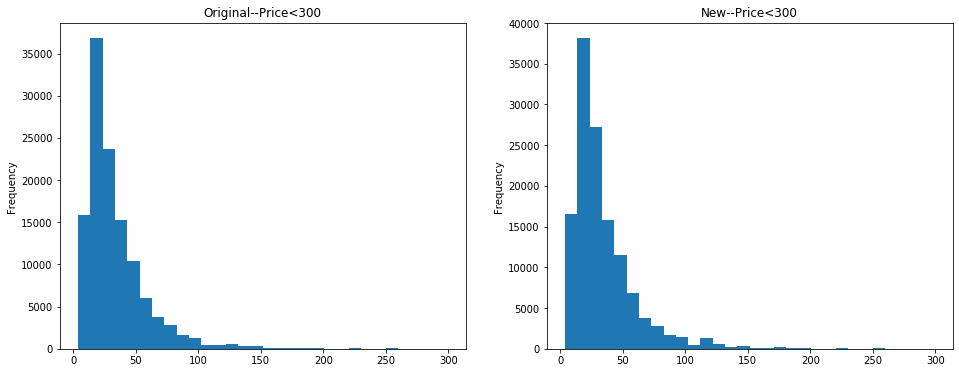

In [41]:
#可视化对比新旧数据集
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
reviews[reviews['price'] < 300]['price'].plot(kind='hist', title='Original--Price<300', bins=30)

plt.subplot(1,2,2)
samed[samed['price'] < 300]['price'].plot(kind='hist', title='New--Price<300', bins=30)